# QoL Monitor - Modeling

For the Machine Learning algorithms modeling, we decided to use the Scikit-learn toolbox due to its high acceptance in the scientific community and the consistency of its results.

## Required Installs

In [1]:
pip install featurewiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 9.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Required Imports

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from featurewiz import featurewiz
from matplotlib.pyplot import figure
from sklearn.linear_model import Lasso
from yellowbrick.features import Rank2D
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.features import rank1d, rank2d
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from oauth2client.client import GoogleCredentials
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import prediction_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



## Getting Processed Data

In [3]:
base_path = '/kaggle/input/self-reported-qol/20230625-processed-'

df_physical      = pd.read_csv(base_path + 'physical-qol.csv')
df_psychological = pd.read_csv(base_path + 'psychological-qol.csv')

In [4]:
df_physical.drop('id', axis=1, inplace=True)         # id
df_physical.drop('day', axis=1, inplace=True)        # day

df_psychological.drop('id', axis=1, inplace=True)    # id
df_psychological.drop('day', axis=1, inplace=True)   # day

## Stratifying our dataset

In [5]:
phy_all_tmp = df_physical.copy()
phy_init_set_tmp = phy_all_tmp.query("group in ('Initial Set')").copy()
phy_ufpi_ufc_tmp = phy_all_tmp.query("group in ('UFPI', 'UFC')").copy()

psy_all_tmp = df_psychological.copy()
psy_init_set_tmp = psy_all_tmp.query("group in ('Initial Set')").copy()
psy_ufpi_ufc_tmp = psy_all_tmp.query("group in ('UFPI', 'UFC')").copy()

In [6]:
phy_all_tmp.drop("group", axis=1, inplace=True)
phy_init_set_tmp.drop("group", axis=1, inplace=True)
phy_ufpi_ufc_tmp.drop("group", axis=1, inplace=True)

psy_all_tmp.drop("group", axis=1, inplace=True)
psy_init_set_tmp.drop("group", axis=1, inplace=True)
psy_ufpi_ufc_tmp.drop("group", axis=1, inplace=True)

In [7]:
# Separating predictors from the values to be predicted.
phy_all           = phy_all_tmp.drop("phy_ref_score", axis=1)
phy_all_pred      = phy_all_tmp["phy_ref_score"].copy()
phy_init_set      = phy_init_set_tmp.drop("phy_ref_score", axis=1)
phy_init_set_pred = phy_init_set_tmp["phy_ref_score"].copy()
phy_ufpi_ufc      = phy_ufpi_ufc_tmp.drop("phy_ref_score", axis=1)
phy_ufpi_ufc_pred = phy_ufpi_ufc_tmp["phy_ref_score"].copy()

psy_all           = psy_all_tmp.drop("psy_ref_score", axis=1)
psy_all_pred      = psy_all_tmp["psy_ref_score"].copy()
psy_init_set      = psy_init_set_tmp.drop("psy_ref_score", axis=1)
psy_init_set_pred = psy_init_set_tmp["psy_ref_score"].copy()
psy_ufpi_ufc      = psy_ufpi_ufc_tmp.drop("psy_ref_score", axis=1)
psy_ufpi_ufc_pred = psy_ufpi_ufc_tmp["psy_ref_score"].copy()

## Feature Selection

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (1416, 107)
    Some column names had special characters which were removed...
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S 

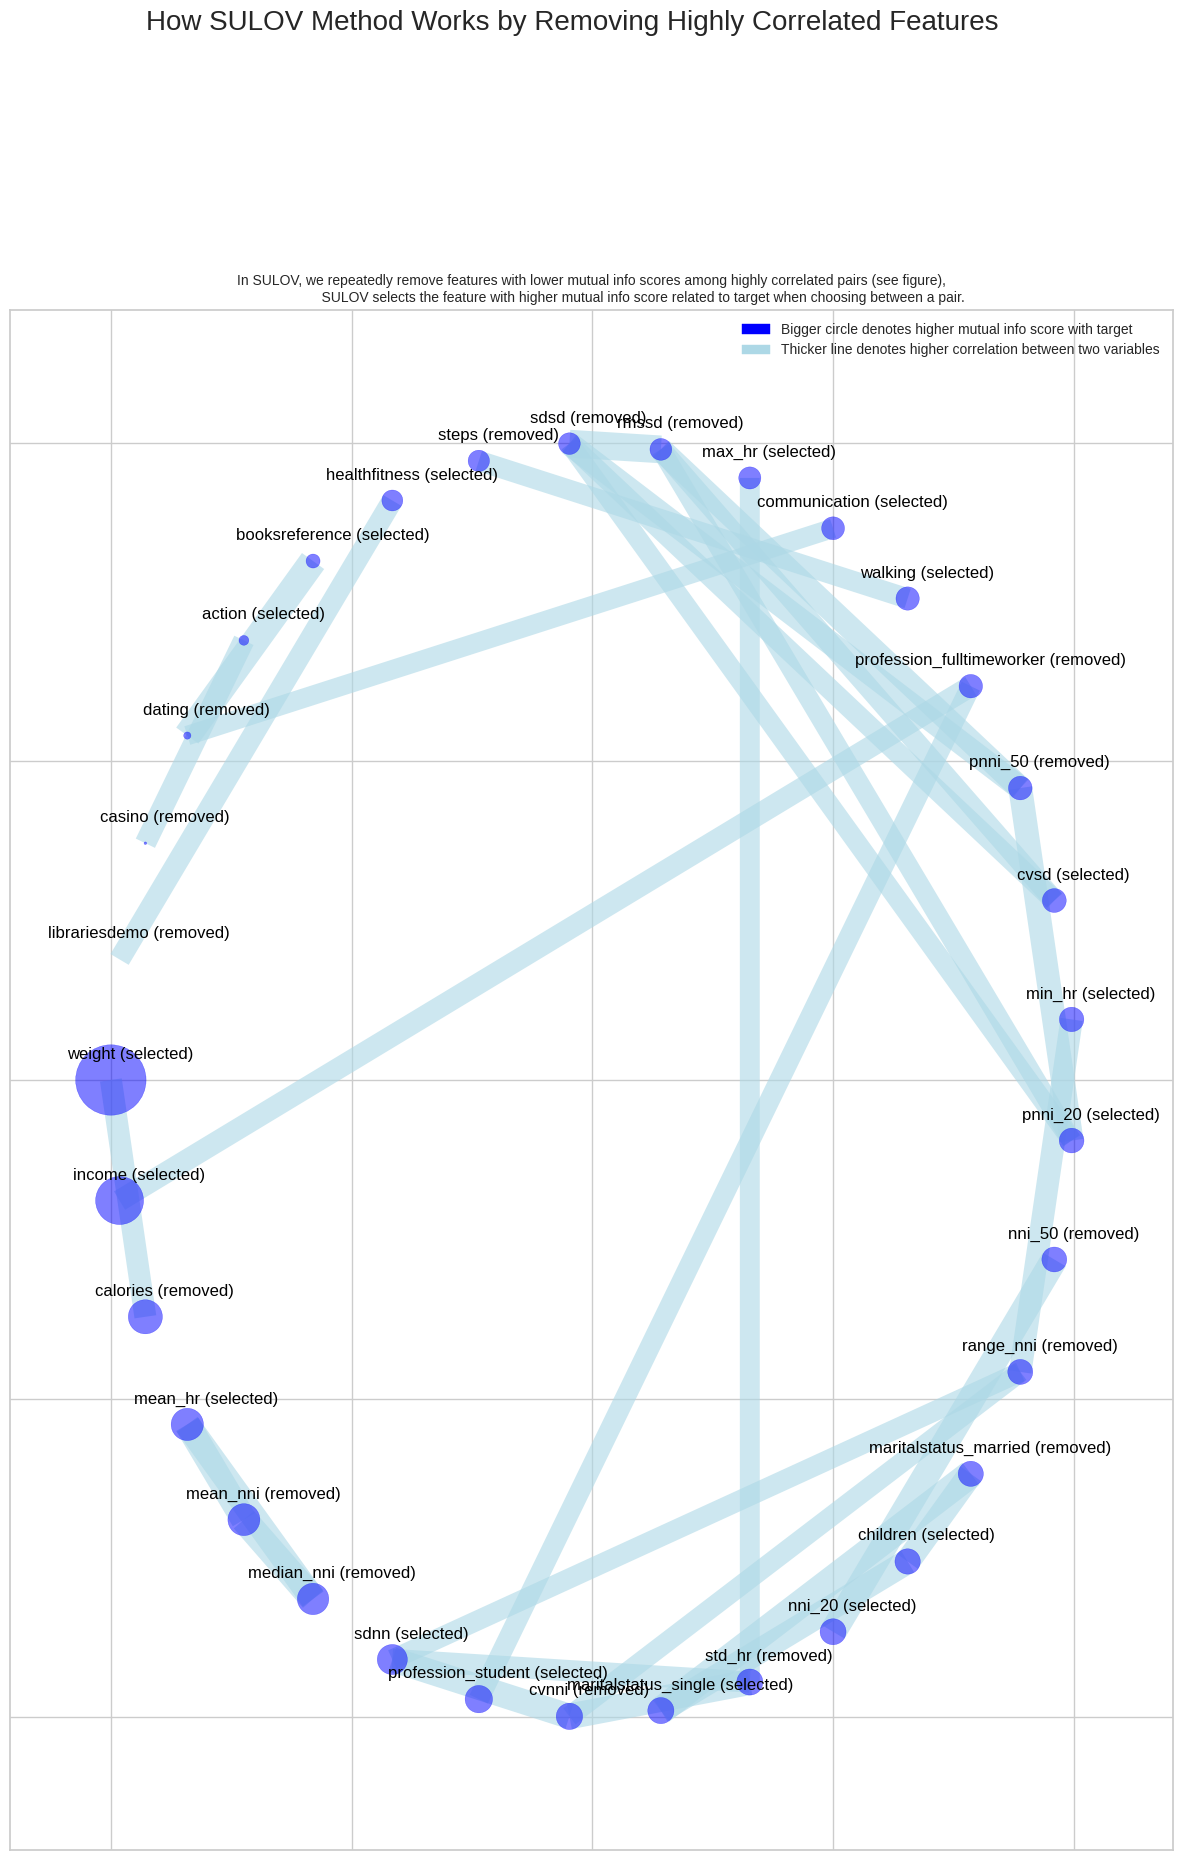

Time taken for SULOV method = 3 seconds
    Adding 1 categorical variables to reduced numeric variables  of 85
Finally 86 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after adding missing values flags = (1416, 87)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 20 features per iteration...
    XGBoost version using 1.7.5 as tree method: hist
    Number of booster rounds = 100
        Selected: ['height', 'income', 'personalization', 'specificage', 'weight', 'healthfitness', 'sdnn', 'communication', 'business', 'nni_20', 'social', 'productivity', 'mean_hr', 'lightsleep', 'finance', 

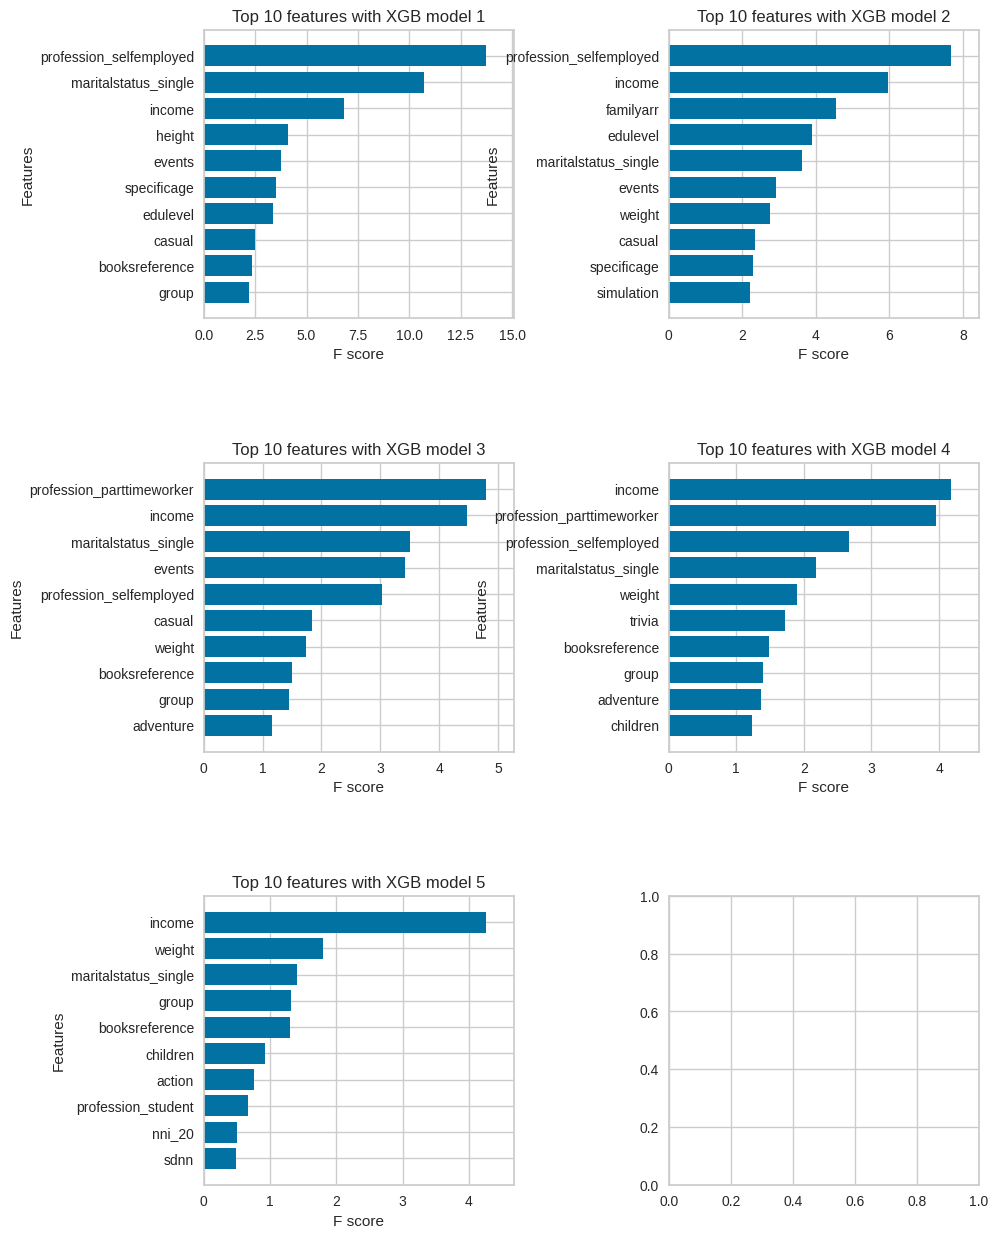

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 40 important features. Too many to print...
Total Time taken for featurewiz selection = 56 seconds
Output contains a list of 40 important features and a train dataframe
['height', 'income', 'personalization', 'specificage', 'weight', 'healthfitness', 'sdnn', 'communication', 'business', 'nni_20', 'social', 'productivity', 'mean_hr', 'lightsleep', 'finance', 'musicaudio', 'entertainment', 'videoplayerseditors', 'education', 'travellocal', 'familyarr', 'other', 'cvsd', 'casual', 'pnni_20', 'shopping', 'max_hr', 'walking', 'min_hr', 'profession_parttimeworker', 'group', 'sports', 'invehicle', 'profession_selfemployed', 'booksreference', 'maritalstatus_single', 'strateg

In [8]:
features, train = featurewiz(df_physical, 'phy_ref_score', corr_limit=0.7, verbose=2, sep=",", header=0,test_data="", feature_engg="", category_encoders="")
print(features)

In [9]:
features_selected = ['height', 'income', 'personalization', 'specificage', 'weight', 'healthfitness', 'sdnn', 'communication', 'business', 'nni_20', 'social', 'productivity', 'mean_hr', 'lightsleep', 'finance', 'musicaudio', 'entertainment', 'videoplayerseditors', 'education', 'travellocal', 'familyarr', 'other', 'cvsd', 'casual', 'pnni_20', 'shopping', 'max_hr', 'walking', 'min_hr', 'profession_parttimeworker', 'group', 'sports', 'invehicle', 'profession_selfemployed', 'booksreference', 'maritalstatus_single', 'strategy', 'profession_student', 'children', 'action']

## Training regression models

In [10]:
cols_rdf = ['exec_index', 'name', 'model', 'n_folds', 'mae_mean', 'mae_std', 'rmse_mean', 'rmse_std', 'time(s)']

In [11]:
def getDataset(domain_group):
    return {
        'phy_all': (phy_all, phy_all_pred),
        'psy_all': (psy_all, psy_all_pred),
        
        'phy_init_set': (phy_init_set, phy_init_set_pred),
        'psy_init_set': (psy_init_set, psy_init_set_pred),
        
        'phy_ufpi_ufc': (phy_ufpi_ufc, phy_ufpi_ufc_pred),
        'psy_ufpi_ufc': (psy_ufpi_ufc, psy_ufpi_ufc_pred),
    }[domain_group] 

In [12]:
def rmsle_cv(exec_index, name, model, n_folds, X, y):
    start = time.time()
    kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(X.values)
    rmse = np.sqrt(-cross_val_score(model, X.values, y, scoring = "neg_mean_squared_error", cv = kf))
    mae = -cross_val_score(model, X.values, y, scoring = "neg_mean_absolute_error", cv = kf)
    end = time.time()
    exec_time = end - start
    return pd.Series([exec_index, name, model, n_folds, 
                      round(mae.mean(), 4), round(mae.std(), 4), 
                      round(rmse.mean(), 4), round(rmse.std(), 4), 
                      round(exec_time, 4)], index=cols_rdf)

In [13]:
def train_model(name, model, n_folds, X, y, executions):
    df = pd.DataFrame(columns = cols_rdf)
    for exec_index in range(executions):
        result = rmsle_cv(exec_index, name, model, n_folds, X, y)
        df = pd.concat([df, result.to_frame().T], ignore_index=True)
    return df

In [14]:
def modelingRegressors(domain_group):
    X, y = getDataset(domain_group)
    executions = 2
    print('Modeling regressors for', domain_group)
    
    df_1 = train_model("Linear Regression", LinearRegression(),   10, X, y, executions)
    df_2 = train_model("Decision Tree", DecisionTreeRegressor(),  10, X, y, executions)
    df_3 = train_model("Random Forest", RandomForestRegressor(),  10, X, y, executions)
    #df_4 = train_model("SVM (Linear)",  svm.SVC(kernel='linear'), 10, X, y, executions)
    #df_5 = train_model("SVM (RBF)",     svm.SVC(kernel='rbf'),    10, X, y, executions)
    
    GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
    
    #df_6 = train_model("GBoost", GBoost, 10, X, y, executions)
    
    return pd.concat([df_1, df_2, df_3])

In [15]:
modelingRegressors('phy_init_set')

Modeling regressors for phy_init_set


,exec_index,name,model,n_folds,mae_mean,mae_std,rmse_mean,rmse_std,time(s)
0,0,Linear Regression,LinearRegression(),10,10.9054,4.9343,25.761,35.5594,1.1423
1,1,Linear Regression,LinearRegression(),10,10.9054,4.9343,25.761,35.5594,1.1308
0,0,Decision Tree,DecisionTreeRegressor(),10,8.6903,2.7689,16.9647,6.8595,0.9417
1,1,Decision Tree,DecisionTreeRegressor(),10,8.7012,2.6555,18.0903,7.698,0.8428
0,0,Random Forest,RandomForestRegressor(),10,6.9718,2.3877,12.2801,7.1101,55.4954
1,1,Random Forest,RandomForestRegressor(),10,7.0099,2.347,12.1227,7.0901,55.5756


## Visualization for model predictions

In [16]:
# https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
# https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b
def buildResidualGraph(X, y, regressor, mytitle):
    # spliting dataset 70/30
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # adjusting y type to float
    y_train = y_train.apply(pd.to_numeric, errors='coerce')
    y_train.astype('float')
    y_test = y_test.apply(pd.to_numeric, errors='coerce')
    y_test.astype('float')

    figure(figsize=(8, 6), dpi=80)

    # Instantiate the visualizer
    visualizer = ResidualsPlot(regressor, title=mytitle)

    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()                 # Finalize and render the figure

In [17]:
# https://www.scikit-yb.org/en/latest/api/regressor/peplot.html
def buildPredictionErrorGraph(X, y, regressor, mytitle):
    # spliting dataset 70/30
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # adjusting y type to float
    y_train = y_train.apply(pd.to_numeric, errors='coerce')
    y_train.astype('float')
    y_test = y_test.apply(pd.to_numeric, errors='coerce')
    y_test.astype('float')

    figure(figsize=(10, 8), dpi=100)

    # Instantiate the visualizer
    visualizer = prediction_error(regressor, X_train, y_train, X_test, y_test, title=mytitle)
    # Finalize and render the figure
    visualizer.show()     

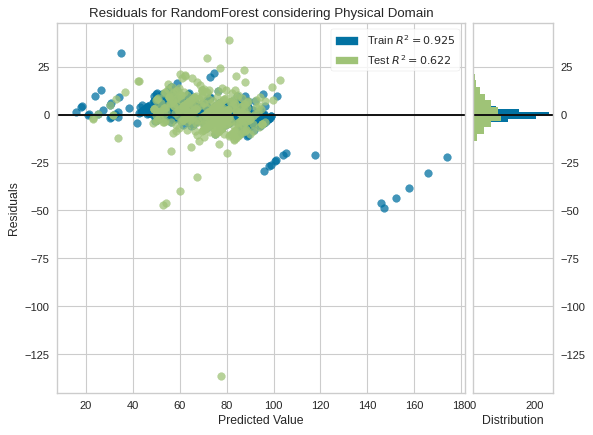

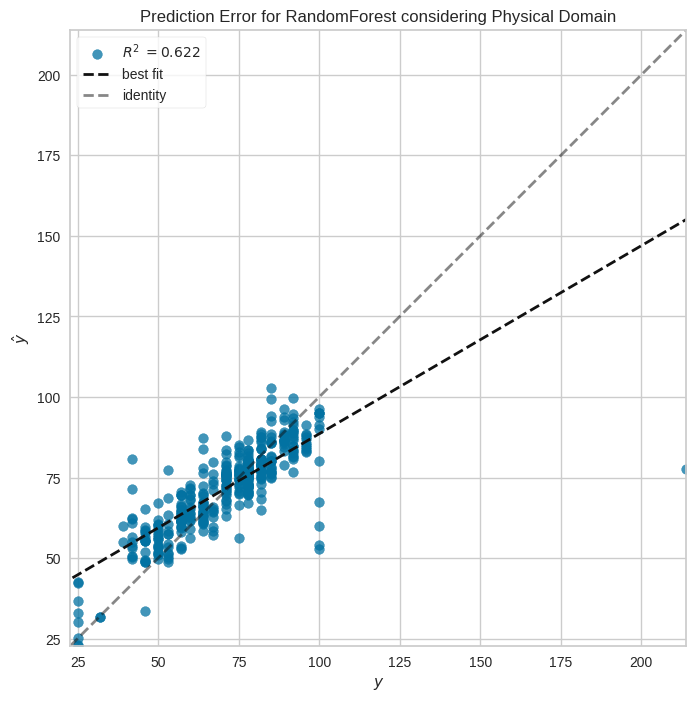

In [18]:
def get_new_randomforest():
    return RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

# Build residual graphic for physical dataset
X = phy_all.filter(features_selected)
buildResidualGraph(X, phy_all_pred, get_new_randomforest(), 'Residuals for RandomForest considering Physical Domain')
buildPredictionErrorGraph(X, phy_all_pred, get_new_randomforest(), 'Prediction Error for RandomForest considering Physical Domain')